In [1]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df = pd.read_csv('PS_20174392719_1491204439457_log.csv')

In [5]:
df.head()

,step,type,amount,nameOrig,oldbalanceOrg,newbalanceOrig,nameDest,oldbalanceDest,newbalanceDest,isFraud,isFlaggedFraud
0,1,PAYMENT,9839.64,C1231006815,170136.0,160296.36,M1979787155,0.0,0.0,0,0
1,1,PAYMENT,1864.28,C1666544295,21249.0,19384.72,M2044282225,0.0,0.0,0,0
2,1,TRANSFER,181.00,C1305486145,181.0,0.00,C553264065,0.0,0.0,1,0
3,1,CASH_OUT,181.00,C840083671,181.0,0.00,C38997010,21182.0,0.0,1,0
4,1,PAYMENT,11668.14,C2048537720,41554.0,29885.86,M1230701703,0.0,0.0,0,0


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6362620 entries, 0 to 6362619
Data columns (total 11 columns):
 #   Column          Dtype  
---  ------          -----  
 0   step            int64  
 1   type            object 
 2   amount          float64
 3   nameOrig        object 
 4   oldbalanceOrg   float64
 5   newbalanceOrig  float64
 6   nameDest        object 
 7   oldbalanceDest  float64
 8   newbalanceDest  float64
 9   isFraud         int64  
 10  isFlaggedFraud  int64  
dtypes: float64(5), int64(3), object(3)
memory usage: 534.0+ MB


In [9]:
for col in df.columns:
    print(df[col].unique())

[  1   2   3   4   5   6   7   8   9  10  11  12  13  14  15  16  17  18
  19  20  21  22  23  24  25  26  27  28  29  30  31  32  33  34  35  36
  37  38  39  40  41  42  43  44  45  46  47  48  49  50  51  52  53  54
  55  56  57  58  59  60  61  62  63  64  65  66  67  68  69  70  71  72
  73  74  75  76  77  78  79  80  81  82  83  84  85  86  87  88  89  90
  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107 108
 109 110 111 112 113 114 115 116 117 118 119 120 121 122 123 124 125 126
 127 128 129 130 131 132 133 134 135 136 137 138 139 140 141 142 143 144
 145 146 147 148 149 150 151 152 153 154 155 156 157 158 159 160 161 162
 163 164 165 166 167 168 169 170 171 172 173 174 175 176 177 178 179 180
 181 182 183 184 185 186 187 188 189 190 191 192 193 194 195 196 197 198
 199 200 201 202 203 204 205 206 207 208 209 210 211 212 213 214 215 216
 217 218 219 220 221 222 223 224 225 226 227 228 229 230 231 232 233 234
 235 236 237 238 239 240 241 242 243 244 245 246 24

In [18]:
(df['amount'] == 0.0).sum()

16

In [19]:
zeros = df[df['amount'] == 0.0].index
df.drop(zeros, inplace=True)

In [20]:
(df['amount'] == 0.0).sum()

0

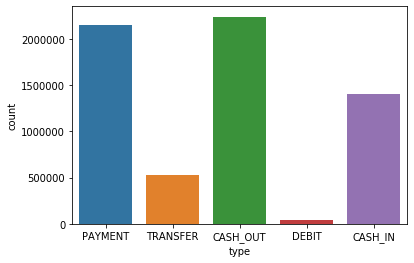

In [21]:
sns.countplot(x='type', data=df)

In [22]:
df['amount'].min()

0.01

In [23]:
df['amount'].max()

92445516.64

In [24]:
df['amount'].mean()

179862.35584671315

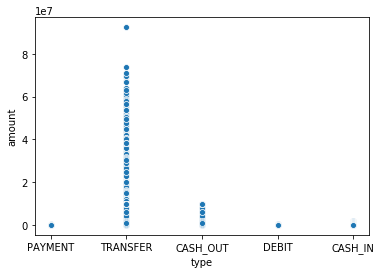

In [33]:
sns.scatterplot(x='type', y='amount', data=df)

In [37]:
indices = df[df['oldbalanceOrg']==0].index
print(df.loc[indices])

         step      type     amount     nameOrig  oldbalanceOrg  \
29          1   PAYMENT    9920.52   C764826684            0.0   
30          1   PAYMENT    3448.92  C2103763750            0.0   
31          1   PAYMENT    4206.84   C215078753            0.0   
32          1   PAYMENT    5885.56   C840514538            0.0   
33          1   PAYMENT    5307.88  C1768242710            0.0   
...       ...       ...        ...          ...            ...   
6355984   709   PAYMENT    3837.05  C1751522910            0.0   
6356000   709  CASH_OUT  104570.26   C606038734            0.0   
6356051   709  CASH_OUT  244966.80  C2092646234            0.0   
6356052   709  CASH_OUT  123403.11  C1054278487            0.0   
6356244   709   PAYMENT   14499.40  C1009494758            0.0   

         newbalanceOrig     nameDest  oldbalanceDest  newbalanceDest  isFraud  \
29                  0.0  M1940055334            0.00            0.00        0   
30                  0.0   M335107734         

In [40]:
print('Percentage of fraud and non-fraud transactions')
f_percent = df['isFraud'].value_counts(normalize=True)*100
f_percent

Percentage of fraud and non-fraud transactions


0    99.871169
1     0.128831
Name: isFraud, dtype: float64

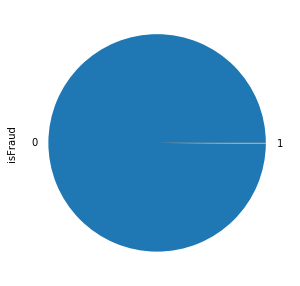

In [41]:
f_percent.plot.pie(figsize=(5, 5))

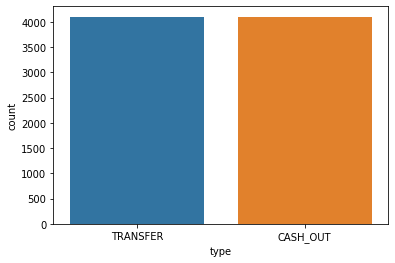

In [42]:
sns.countplot(x='type', data=df[df['isFraud']==1])

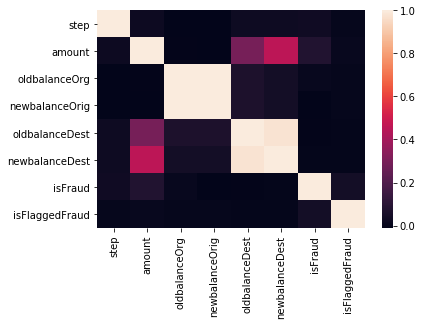

In [44]:
corr = df.corr()
sns.heatmap(corr)